In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5,1,'Survivived')

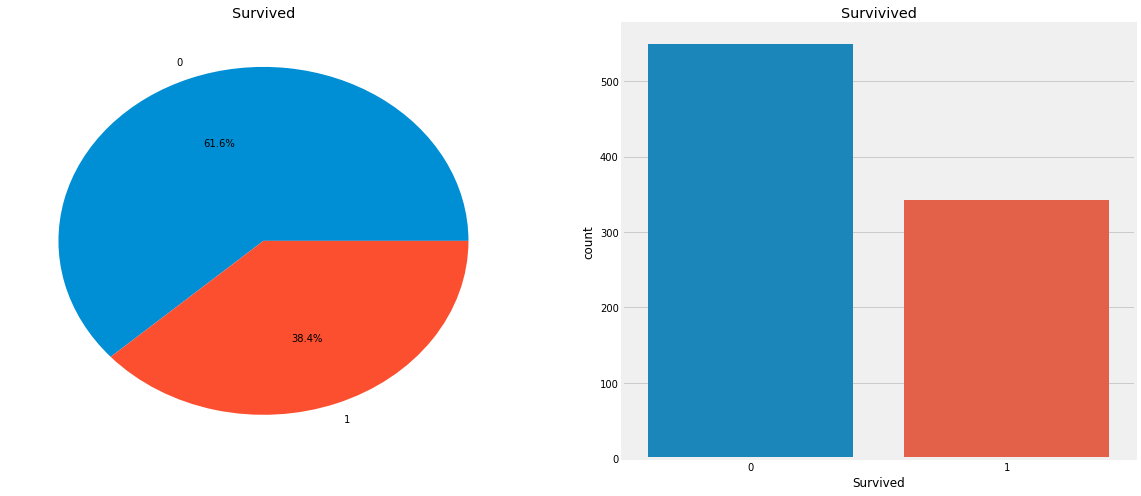

In [4]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df['Survived'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survivived')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5,1,'Sex:Survived vs Dead')

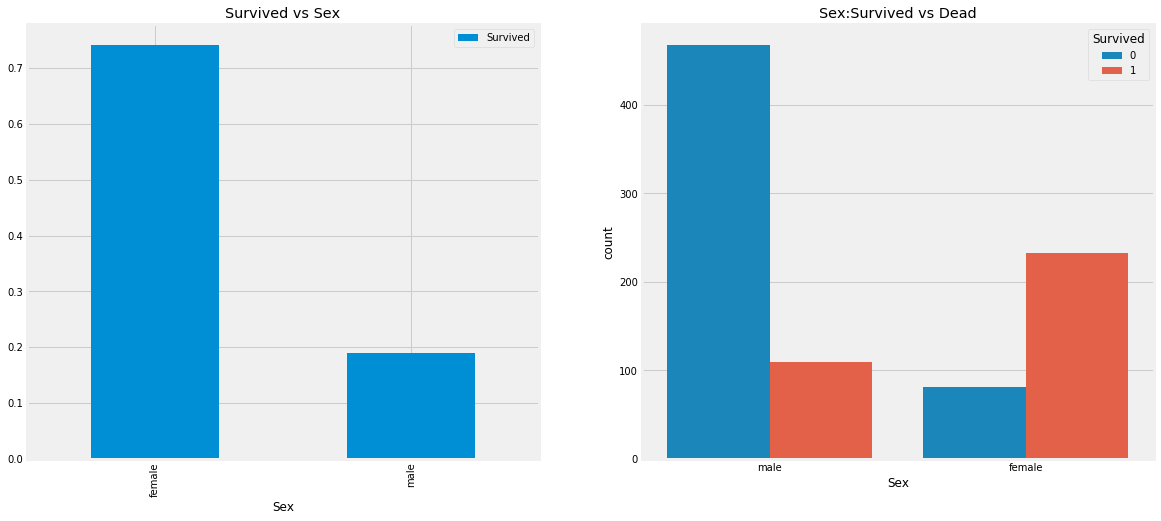

In [7]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

In [8]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


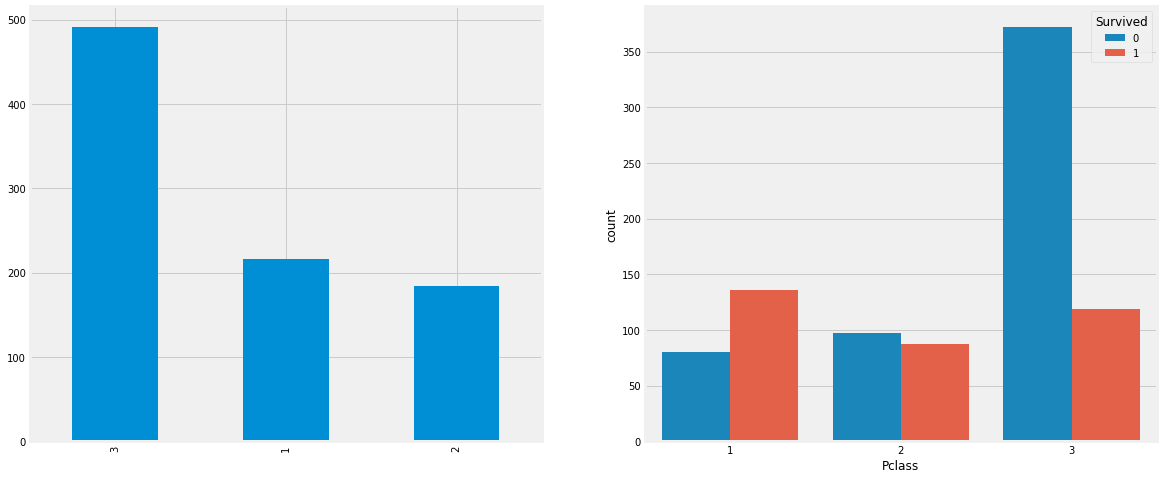

In [9]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])

In [10]:
pd.crosstab([df.Sex,df.Survived],df.Pclass).style.background_gradient(cmap='summer_r')

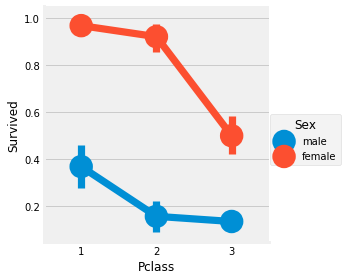

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

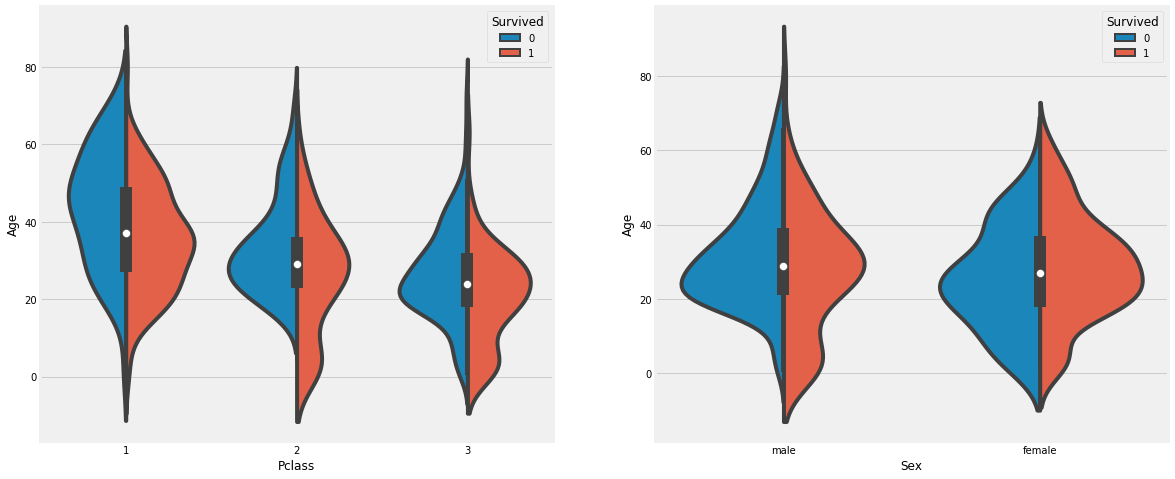

In [13]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',split=True,data=df,ax=ax[0])
sns.violinplot('Sex','Age',hue='Survived',split=True,data=df,ax=ax[1])

In [14]:
df['Initial']=0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
df.loc[(df.Age.isnull())&(df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Initial=='Other'),'Age']=46

In [20]:
df.Age.isnull().any()

False

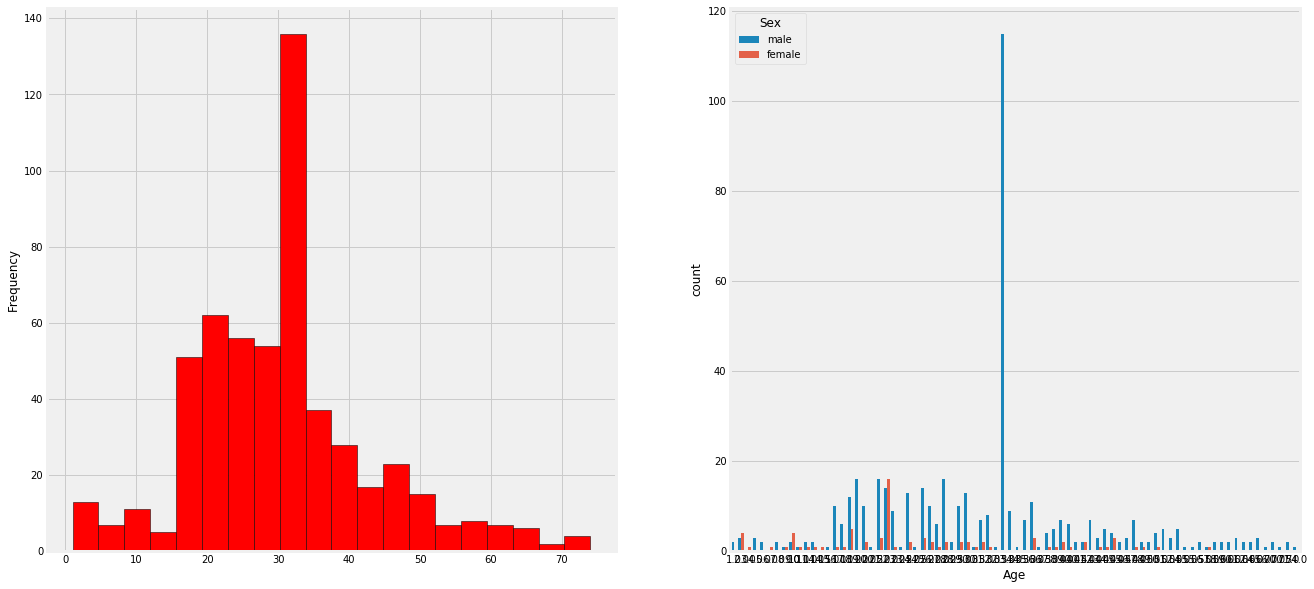

In [21]:
f, ax = plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
sns.countplot('Age',data=df[df['Survived']==0],hue='Sex',ax=ax[1])

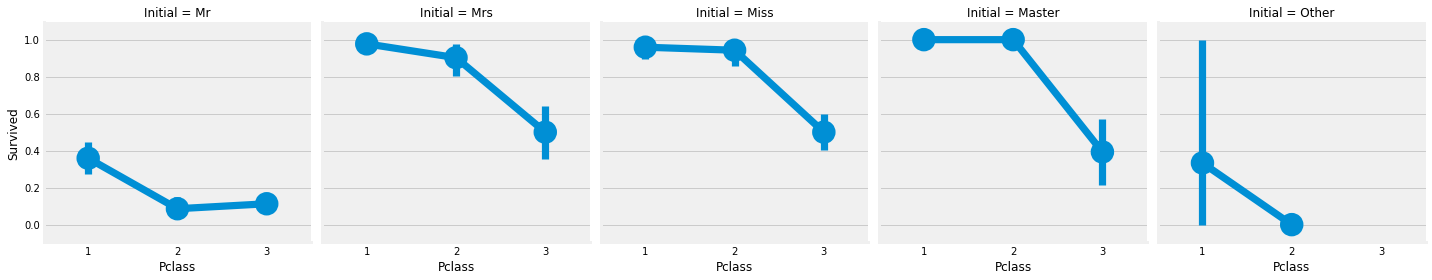

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=df)

In [23]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

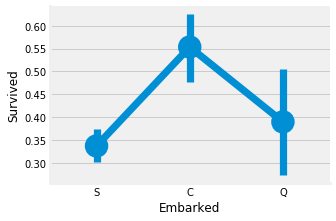

In [24]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(5,3)

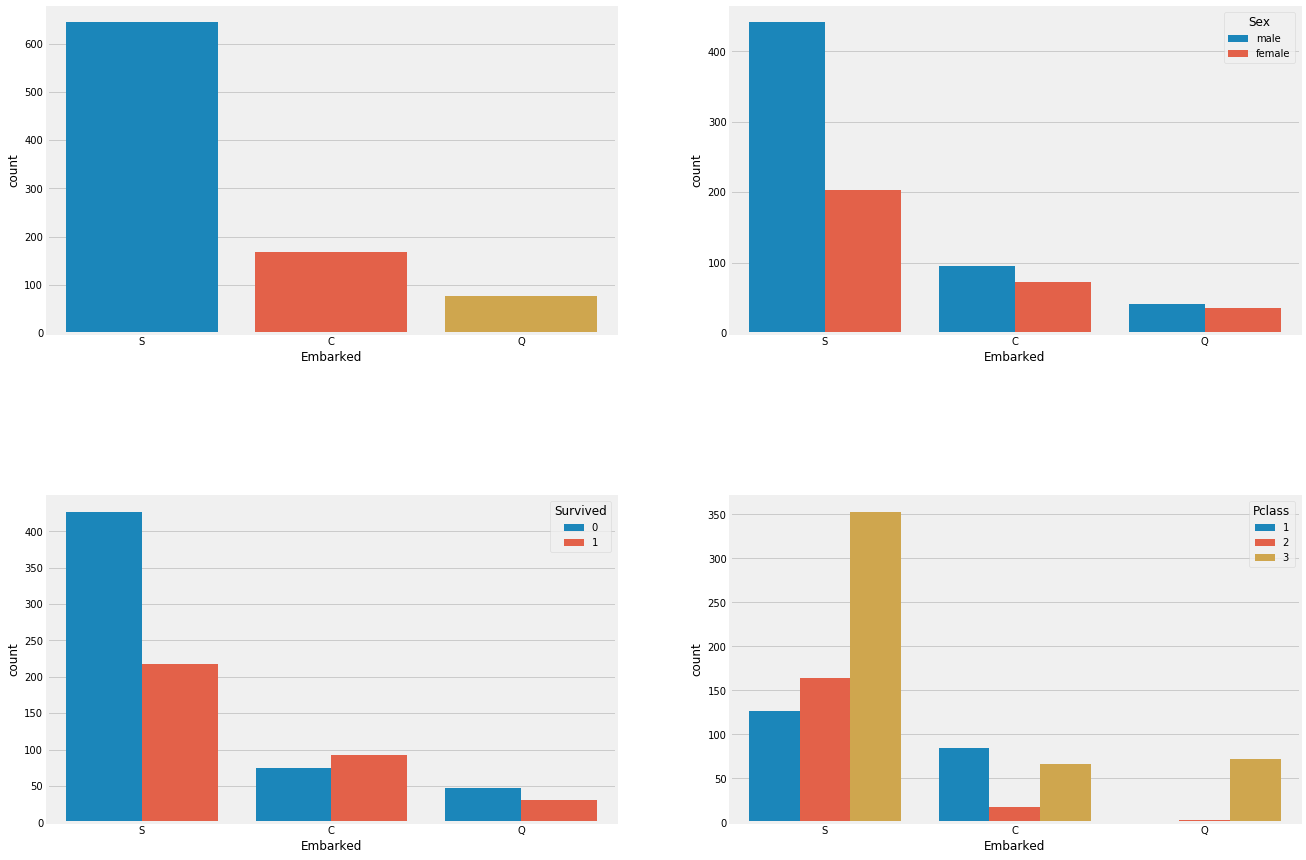

In [25]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
sns.countplot('Embarked',data=df,hue='Sex',ax=ax[0,1])
sns.countplot('Embarked',data=df,hue='Survived',ax=ax[1,0])
sns.countplot('Embarked',data=df,hue='Pclass',ax=ax[1,1])
plt.subplots_adjust(wspace=0.2,hspace=0.5)

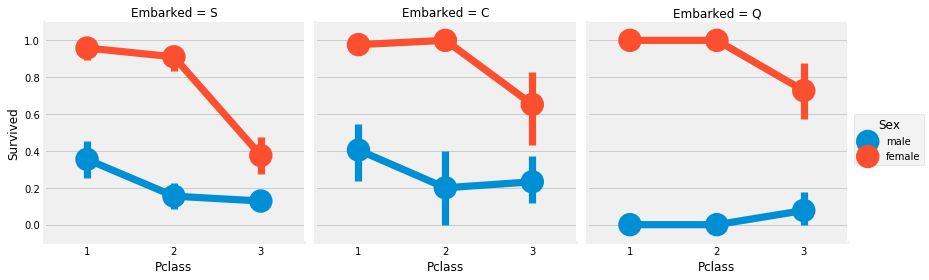

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)

In [27]:
df['Embarked'].fillna('S',inplace=True)

In [28]:
df.Embarked.isnull().any()

False

In [30]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


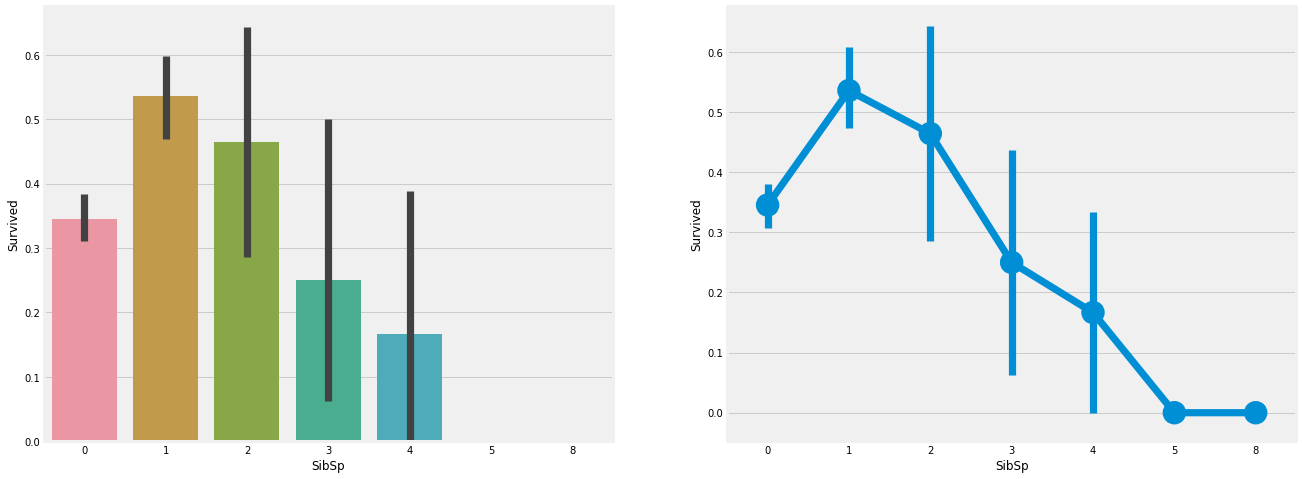

In [35]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df,ax=ax[0])
sns.factorplot('SibSp','Survived',data=df,ax=ax[1])
plt.close(2)

In [36]:
pd.crosstab(df.SibSp,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [37]:
pd.crosstab(df.Parch,df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [38]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

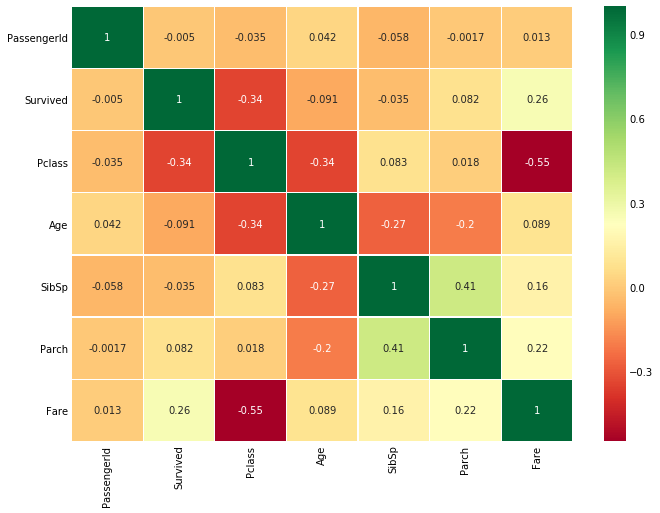

In [59]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

In [68]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,age_band,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,2


In [70]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


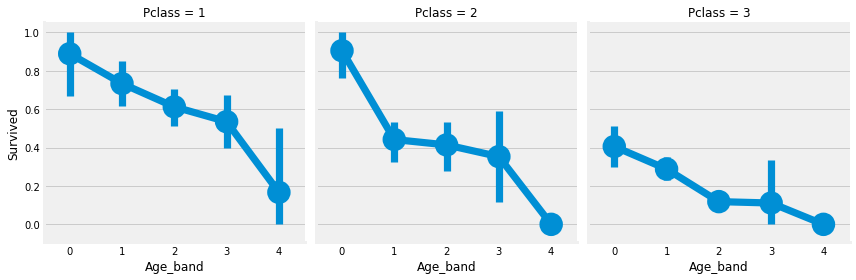

In [74]:
sns.factorplot('Age_band','Survived',data=df,col='Pclass')

In [75]:
df['family_size']=0
df['family_size']=df['Parch']+df['SibSp']
df['Alone']=0
df.loc[df.family_size==0,'Alone']=1

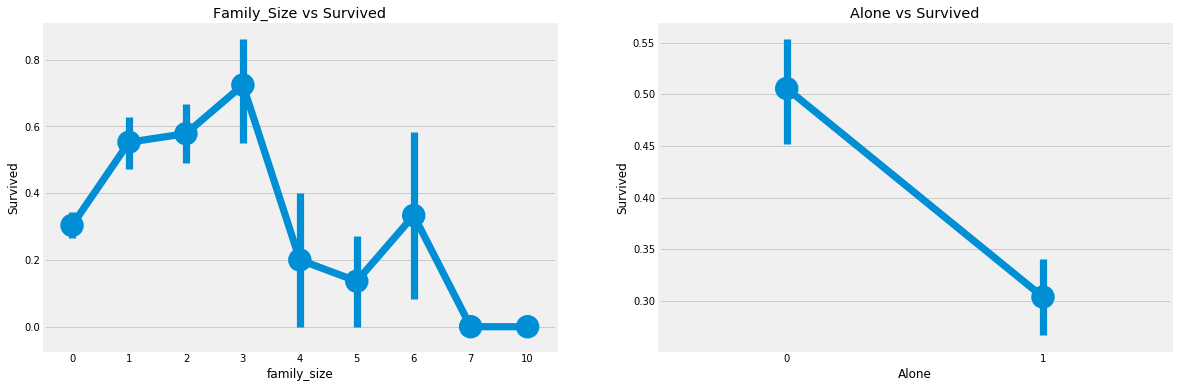

In [77]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('family_size','Survived',data=df,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=df,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)

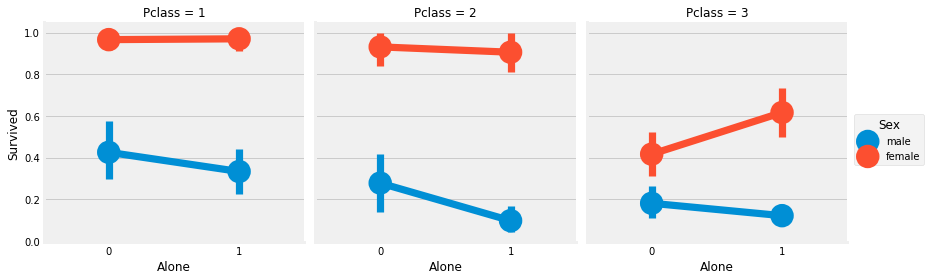

In [78]:
sns.factorplot('Alone','Survived',data=df,hue='Sex',col='Pclass')